Predict the price of the Uber ride from a given pickup point to 
the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression 
models.
Evaluate the models and compare their respective scores like R2, 
RMSE, etc.

In [55]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [56]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [57]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [58]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) 

In [59]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [61]:
df.shape

(200000, 7)

Pre-processing

In [62]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [65]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [66]:
#conversion to numeric 
df['pickup_datetime']=df['pickup_datetime'].dt.year

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  int64  
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 12.2 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1927add0280>,
 'caps': [<matplotlib.lines.Line2D at 0x1927add06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1927ad9ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1927add0be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1927add0e80>],
 'means': []}

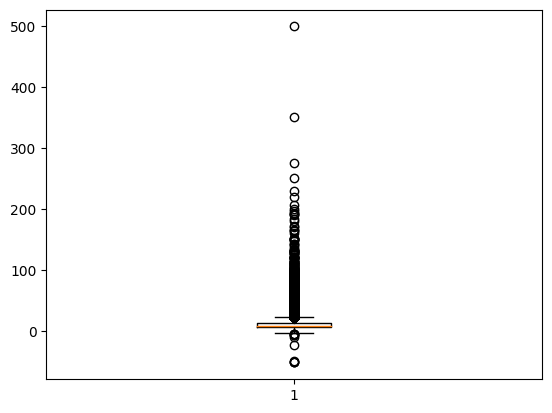

In [68]:
plt.boxplot(df['fare_amount'])

In [69]:
#Outlier removal

#calculation of quartiles
q1=df['fare_amount'].quantile(0.25)
q3=df['fare_amount'].quantile(0.75)

# removing outliers
df= df[(df['fare_amount'] > q1) & (df['fare_amount'] < q3)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1927ae1ac50>,
 'caps': [<matplotlib.lines.Line2D at 0x1927ae1b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1927ae1a9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1927ae1b6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1927ae1b970>],
 'means': []}

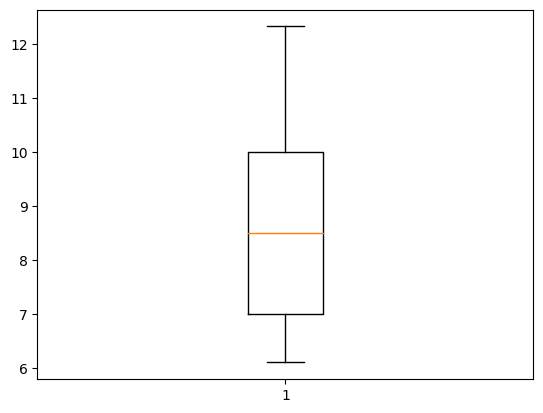

In [70]:
plt.boxplot(df['fare_amount'])

In [71]:
#Checking correlation
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.111282,0.003362,-0.003290,0.004261,-0.004284,0.010518
pickup_datetime,0.111282,1.000000,0.010155,-0.010868,0.006909,-0.009239,-0.000730
pickup_longitude,0.003362,0.010155,1.000000,-0.921815,0.935125,-0.923148,-0.002971
pickup_latitude,-0.003290,-0.010868,-0.921815,1.000000,-0.910596,0.929851,0.001303
dropoff_longitude,0.004261,0.006909,0.935125,-0.910596,1.000000,-0.979346,-0.001722
dropoff_latitude,-0.004284,-0.009239,-0.923148,0.929851,-0.979346,1.000000,0.000005
passenger_count,0.010518,-0.000730,-0.002971,0.001303,-0.001722,0.000005,1.000000


In [72]:
#X is predictor variable and y is target variable
X=df.drop('fare_amount',axis=1)
y=df['fare_amount']

In [73]:
#splitting the dataset for training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [74]:
#linear Regression
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

In [75]:
#Prediction
predict = lrmodel.predict(X_test)

In [76]:
#Model Evaluation
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  1.7118677868146563


In [77]:
#Random Forest
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfrmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [78]:
#Prediction
rfrmodel_pred = rfrmodel.predict(X_test)

In [79]:
#Model Evaluation
rfrmodelrmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE error for the model is ", rfrmodelrmse)

RMSE error for the model is  1.259723451003153


In [80]:
#R2 score:
from sklearn.metrics import r2_score
lr2 = r2_score(y_test, predict)
Rr2=r2_score(y_test, rfrmodel_pred)
print('R2 Score of linear model: ',lr2)
print('R2 Score of Random Forest: ',Rr2)

R2 Score of linear model:  0.011153473348238463
R2 Score of Random Forest:  0.46452539193645925


Here, the R2 score of random forest is near to 1 and also the rmse value of random forest is less which indicates random forest is more
efficient 